In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
train = pd.read_csv('titanic_train.csv')

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


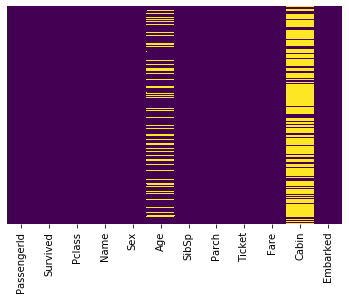

In [7]:
sns.heatmap(train.isnull(),yticklabels=False,cbar = False,cmap='viridis')

In [8]:
sns.set_style('whitegrid')

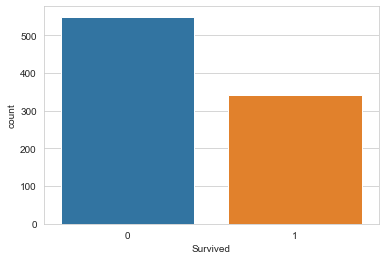

In [9]:
sns.countplot(x='Survived',data=train)

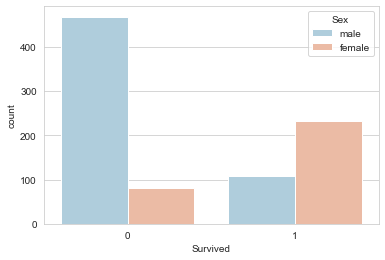

In [10]:
sns.countplot(x='Survived', hue='Sex', data = train, palette='RdBu_r')

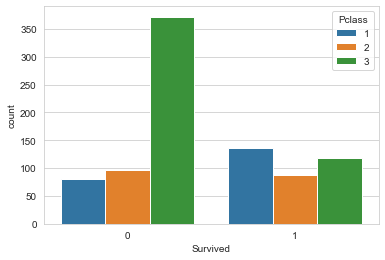

In [11]:
sns.countplot(x='Survived', hue='Pclass', data=train)

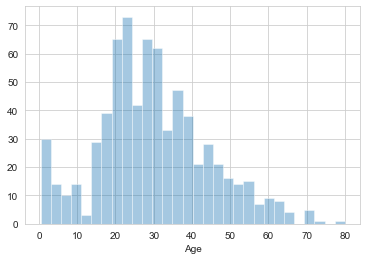

In [12]:
sns.distplot(train['Age'].dropna(),kde=False,bins=30)

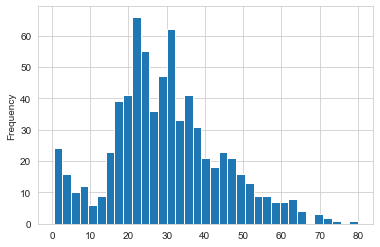

In [13]:
train['Age'].plot.hist(bins=35)

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


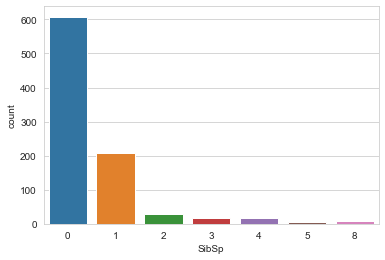

In [15]:
sns.countplot(x='SibSp', data = train)

In [16]:
train['Fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

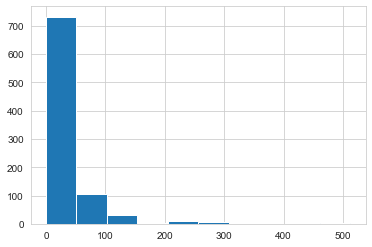

In [17]:
train['Fare'].hist()

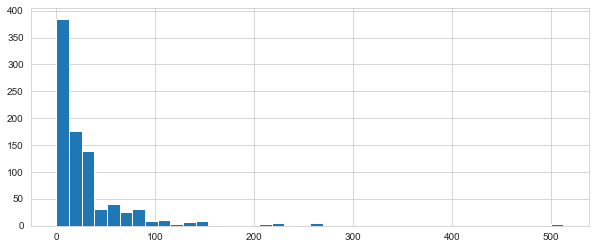

In [18]:
train['Fare'].hist(bins=40,figsize=(10,4))

In [19]:
import cufflinks as cf

In [22]:
cf.go_offline()

In [27]:
#train['Fare'].plot(kind='hist')

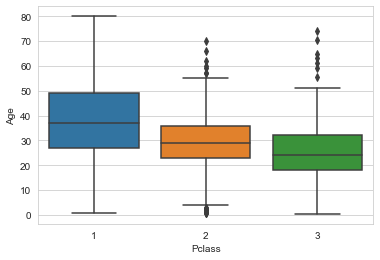

In [28]:
sns.boxplot(x="Pclass",y="Age",data=train)

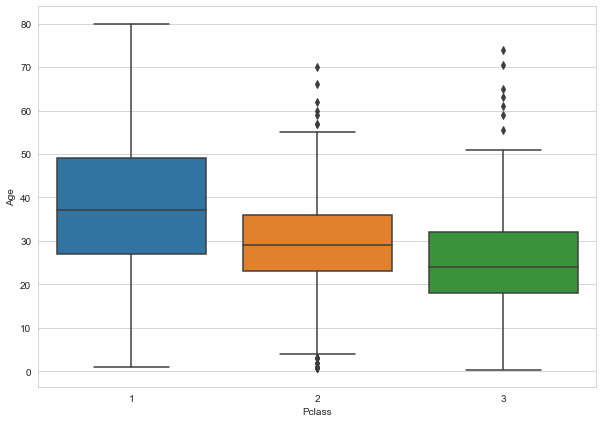

In [30]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=train)

In [33]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
         return Age

In [34]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

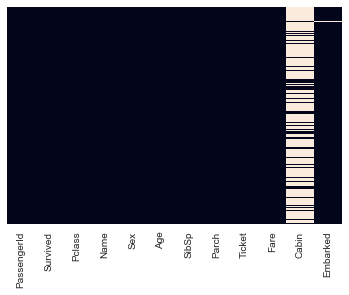

In [35]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

In [36]:
train.drop('Cabin',axis=1,inplace=True)

In [37]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


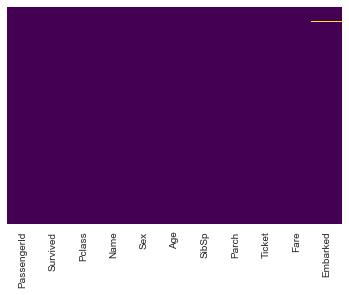

In [39]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [40]:
train.dropna(inplace=True)

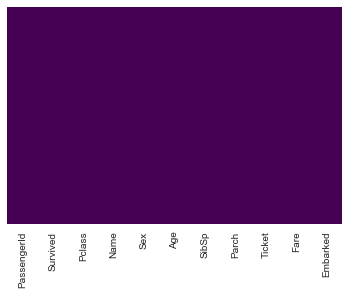

In [41]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [42]:
pd.get_dummies(train['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [44]:
sex=pd.get_dummies(train['Sex'],drop_first=True)

In [46]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [47]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [48]:
train=pd.concat([train,sex,embark],axis=1)

In [49]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0


In [51]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1, inplace=True)

In [52]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [53]:
train.drop('PassengerId',axis=1,inplace=True)

In [54]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [59]:
X = train.drop('Survived',axis=1)
y = train['Survived']

In [60]:
from sklearn.model_selection import train_test_split

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=101)

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
logmod = LogisticRegression()

In [65]:
logmod.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [66]:
predictions = logmod.predict(x_test)

In [67]:
from sklearn.metrics import classification_report

In [68]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.79      0.91      0.85       174
          1       0.84      0.65      0.73       120

avg / total       0.81      0.81      0.80       294



In [69]:
from sklearn.metrics import confusion_matrix

In [70]:
confusion_matrix(y_test,predictions)

array([[159,  15],
       [ 42,  78]], dtype=int64)